In [8]:
#import libraries
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
from itertools import product
import os
from numpy import asarray 


In [9]:
PIL.Image.MAX_IMAGE_PIXELS = 5706050900
im = Image.open('./pune_mumbai_lulc.tif')
row,col = im.size
numpydata = asarray(im)
# data
print(row,col)
print(numpydata[0][0])

MemoryError: 

In [148]:
new_mat = []
for i in range(col):
    mat = []
    for j in range(row):
        (b,g,r) = numpydata[i,j]
        if(b==0 and g==255 and r==255):
            mat.append(34.5)
        elif(b==255 and g==255 and r==0):
            mat.append(6.2)
        elif(b==255 and g==0 and r==255):
            mat.append(9.1)
        elif(b==0 and g==255 and r==0):
            mat.append(34,5)
        elif(b==0 and g==255 and r==255):
            mat.append(4.4)
        elif(b==0 and g==0 and r==255):
            mat.append(3)
        elif(b==255 and g==255 and r==255):
            mat.append(42.8)
        else:
            mat.append(1)
    new_mat.append(mat)


In [132]:
def print_pop(population):
    for i in population:
        print(i)

In [133]:
def initialize_map(p_zero, N):
    # first thing is to create the map that you're trying to navigate.  I will do this randomly.
    # This will be of the form of a adjacency matrix...
    # In other words, an NxN matrix where each row and column correspond to an intersection on a map
    # X_ij, then is equal to the amount of time that it takes to get from position i to position j
    # could also be considered a distance measure... but whatever is easier to think about.
    # practically, then we need a matrix that has numeric values in it... 
    # there should be some paths that don't exist.  I will assign these a 0.  
    # For instance, if you can't get directly from i to j, then X_ij = 0
    
    # The initialization needs some tuning parameters.  One is the proportion of 0's in the final result
    
    the_map = np.zeros((N,N))
    
    for i in range(0, N):
        for j in range(0, i):
            if random.random() > p_zero:
                the_map[i][j] = random.random()
                the_map[j][i] = the_map[i][j]
                
    return the_map

In [134]:
# Let's make a more complicated map that has at least 10 stops that have to be made and see what happens.

def initialize_complex_map(p_zero, N, groups):

    the_map = np.zeros((N,N))
    
    for i in range(0, N):
        for j in range(0, i):
            group_i = int(i/(N/groups))
            group_j = int(j/(N/groups))
            
            if random.random() > p_zero and abs(group_i - group_j) <= 1:
                the_map[i][j] = random.random()
                the_map[j][i] = the_map[i][j]
          
        
    ax = sns.heatmap(the_map)

    plt.show()
        
    return the_map                
            
        

In [135]:
def create_starting_population(size, the_map):
    
    #this just creates a population of different routes of a fixed size.  Pretty straightforward.
    
    population = []
    
    for i in range(0,size):
        population.append(create_new_member(the_map))
        
    return population

In [136]:
def fitness(route, the_map):
    
    score = 0
    
    for i in range(1, len(route)):
        if (the_map[route[i-1]][route[i]] == 0) and i != len(the_map)-1:
            print("WARNING: INVALID ROUTE")
            print(route)
            print(the_map)
        score = score + the_map[route[i-1]][route[i]]

    return score

In [137]:
def crossover(a, b):
        
    # I initially made an error here by allowing routes to crossover at any point, which obviously won't work
    # you have to insure that when the two routes cross over that the resulting routes produce a valid route
    # which means that crossover points have to be at the same position value on the map
    
    common_elements = set(a) & set(b)
    
    if len(common_elements) == 2:
        return (a, b)
    else:
        common_elements.remove(0)
        common_elements.remove(max(a)) 
        value = random.sample(common_elements, 1)        
    
    cut_a = np.random.choice(np.where(np.isin(a, value))[0])
    cut_b = np.random.choice(np.where(np.isin(b, value))[0])
    
    new_a1 = copy.deepcopy(a[0:cut_a])
    new_a2 = copy.deepcopy(b[cut_b:])
    
    new_b1 = copy.deepcopy(b[0:cut_b])
    new_b2 = copy.deepcopy(a[cut_a:])
    
    new_a = np.append(new_a1, new_a2)
    new_b = np.append(new_b1, new_b2)
       
    return (new_a, new_b)

In [138]:
def mutate(route, probability, the_map):
    
    new_route = copy.deepcopy(route)
    
    for i in range(1, len(new_route)):
        if random.random() < probability:
            
            go = True

            while go:

                possible_values = np.nonzero(the_map[new_route[i-1]])
                proposed_value = random.randint(0,len(possible_values[0])-1)
                route = np.append(new_route, possible_values[0][proposed_value])

                if new_route[i] == len(the_map)-1:
                    go = False
                else:
                    i += 1
    
    return new_route

In [139]:
def create_new_member(the_map):
    # here we are going to create a new route
    # the new route can have any number of steps, so we'll select that randomly
    # the structure of the route will be a vector of integers where each value is the next step in the route
    # Everyone starts at 0, so the first value in the vector will indicate where to attempt to go next.
    # That is, if v_i = 4, then that would correspond to X_0,4 in the map that was created at initialization
    
    # N is the size of the map, so we need to make sure that 
    # we don't generate any values that exceed the size of the map

    N = len(the_map)
    
    route = np.zeros(1, dtype=int)

    go = True
    
    i = 1
    
    while go:
        
        possible_values = np.nonzero(the_map[route[i-1]])
        proposed_value = random.randint(0,len(possible_values[0])-1)
        route = np.append(route, possible_values[0][proposed_value])
                
        if route[i] == N-1:
            go = False
        else:
            i += 1
    
    return route

In [140]:
def score_population(population, the_map):
    
    scores = []
    
    for i in range(0, len(population)):
        scores += [fitness(population[i], the_map)]
        
    return scores
        

In [141]:
def pick_mate(scores):

    array = np.array(scores)
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))

    fitness = [len(ranks) - x for x in ranks]
    
    cum_scores = copy.deepcopy(fitness)
    
    for i in range(1,len(cum_scores)):
        cum_scores[i] = fitness[i] + cum_scores[i-1]
        
    probs = [x / cum_scores[-1] for x in cum_scores]
    
    rand = random.random()
    
    for i in range(0, len(probs)):
        if rand < probs[i]:
            
            return i
    

In [142]:
def main():
    
    # parameters
    sparseness_of_map = 0.95
    size_of_map = 1000
    population_size = 30
    number_of_iterations = 1000
    number_of_couples = 9
    number_of_winners_to_keep = 2
    mutation_probability = 0.05
    number_of_groups = 1
    
    # initialize the map and save it 
    # the_map = initialize_complex_map(sparseness_of_map, size_of_map, number_of_groups)
    the_map = new_mat
    # create the starting population
    population_size = row
    population = create_starting_population(population_size, the_map)

    last_distance = 1000000000
    # for a large number of iterations do:
#         note
    for i in range(0,number_of_iterations):
        new_population = []
        
        # evaluate the fitness of the current population
        scores = score_population(population, the_map)

        best = population[np.argmin(scores)]
        number_of_moves = len(best)
        distance = fitness(best, the_map)
        
        if distance != last_distance:
            print('Iteration %i: Best so far is %i steps for a distance of %f' % (i, number_of_moves, distance))
            plot_best(the_map, best, i)

        
        # allow members of the population to breed based on their relative score; 
            # i.e., if their score is higher they're more likely to breed
        for j in range(0, number_of_couples):  
            new_1, new_2 = crossover(population[pick_mate(scores)], population[pick_mate(scores)])
            new_population = new_population + [new_1, new_2]
  
        # mutate
        for j in range(0, len(new_population)):
            new_population[j] = np.copy(mutate(new_population[j], 0.05, the_map))
            
        # keep members of previous generation
        new_population += [population[np.argmin(scores)]]
        for j in range(1, number_of_winners_to_keep):
            keeper = pick_mate(scores)            
            new_population += [population[keeper]]
            
        # add new random members
        while len(new_population) < population_size:
            new_population += [create_new_member(the_map)]
            
        #replace the old population with a real copy
        population = copy.deepcopy(new_population)
                
        last_distance = distance
        
    # plot the results
    

In [145]:
def plot_best(the_map, route, iteration_number):
    ax = sns.heatmap(the_map)

    x=[0.5] + [x + 0.5 for x in route[0:len(route)-1]] + [len(the_map) - 0.5]
    y=[0.5] + [x + 0.5 for x in route[1:len(route)]] + [len(the_map) - 0.5]
    
    plt.plot(x, y, marker = 'o', linewidth=4, markersize=15, linestyle = "-", color='white')
    plt.savefig('new1000plot_%i.png' %(iteration_number), dpi=300)
    plt.show()
    

Iteration 0: Best so far is 2 steps for a distance of 42.800000


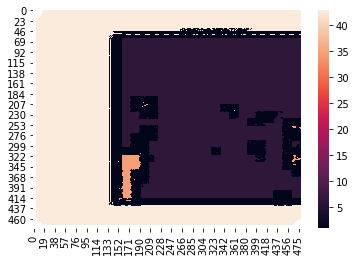

KeyboardInterrupt: 

In [146]:
main()